In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [6]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
plt.imshow(X_train[0].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [5]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [125]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5741

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [127]:
### Your code here

### Initialize result lists

In [178]:
components = np.array([3, 5, 7, 12, 18, 25, 33, 40, 48, 55])
components  = np.unique(np.hstack((components, list(range(2, 70, 2)))))
accuracy_metric = []
variances = []
total_run = 10

### Main loop where we make 5 runs to get results

In [179]:
#Go throw all given number of PCA components
for component in components:
    component_var = []
    for i in range(total_run):
        pca = PCA(n_components=component)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        #here we train our model
        lr.fit(X_train_lowdim, y_train[used_indices])
        y_pred = lr.predict(pca.transform(X_test.reshape([-1, 784])))
        #here we get our variance and accuracy
        score = accuracy_score(y_test, y_pred)
        component_var.append(score)
#add variance and accuracy to result array
    accuracy_metric.append(np.mean(component_var))
    variances.append(np.var(component_var))

### Here we'll draw necessary plots

In [183]:
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


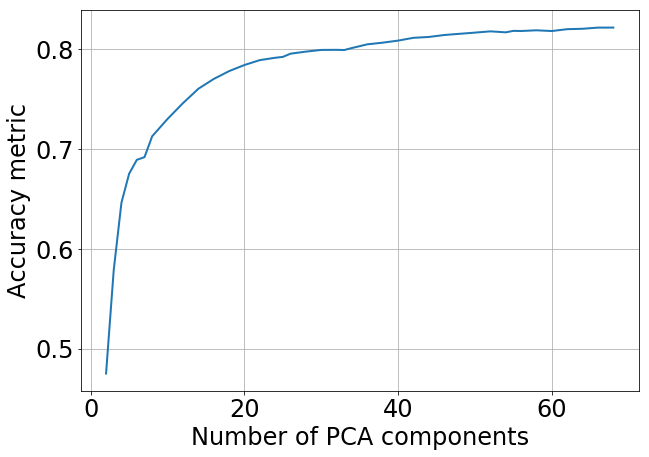

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(components, accuracy_metric)
plt.grid()
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy metric")
#plt.title("Dependece of accuracy metric from number of PCA components")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


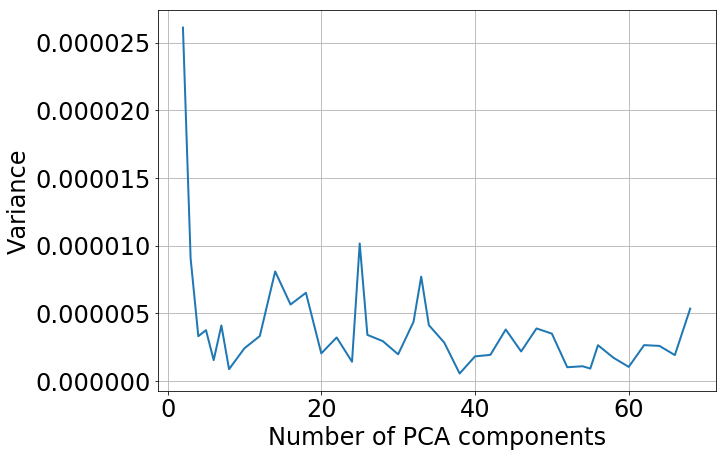

In [194]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(components, variances)
plt.grid()
plt.xlabel("Number of PCA components")
plt.ylabel("Variance of accuracy metric")
#plt.title("Dependece of variance from number of PCA components")
plt.show()

### Вывод: 
Мы можем уменьшить размерность наших данных,взяв ,например, число PCA компонент равное 40, потеряв при этом наименьшее
число информации и значительно снизить сложность вычислений 


# Задание для 3 недели

## Here we'll analyze dependence of the error value and its standard deviation on  training size of a data set

### Initialize necessary variables

In [48]:
pca_components = 40
total_run = 4
accuracy_metric = []
variances = []
set_sizes = np.arange(500, 10500, 500)

### Main loop where we train our model on differrent set sizes

In [49]:
for set_size in set_sizes:
    size_var = []
    for i in range(total_run):
        pca = PCA(n_components=pca_components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), set_size, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        #here we train our model
        lr.fit(X_train_lowdim, y_train[used_indices])
        y_pred = lr.predict(pca.transform(X_test.reshape([-1, 784])))
        #here we get our variance and accuracy
        score = accuracy_score(y_test, y_pred)
        size_var.append(score)
#add variance and accuracy to result array
    accuracy_metric.append(np.mean(size_var))
    variances.append(np.var(size_var))

### Draw the result plots

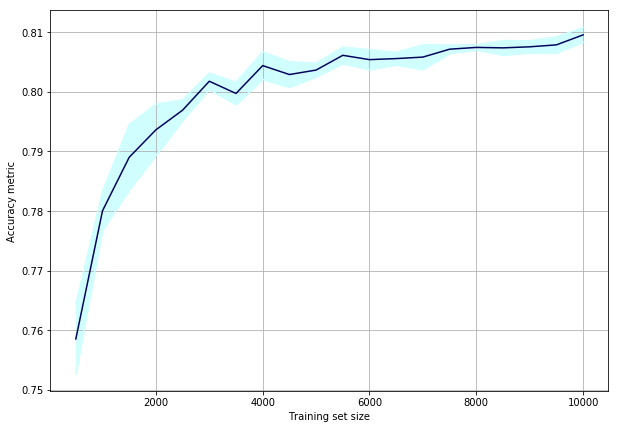

In [50]:
x = np.asarray(set_size)
accuracy_y = np.asarray(accuracy_metric)
variance_y = np.asarray(variances)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_metric,  color='#00035b')
plt.plot(set_sizes, accuracy_y + np.sqrt(variance_y),color='#d0fefe')
plt.plot(set_sizes, accuracy_y - np.sqrt(variance_y), color='#d0fefe')
plt.fill_between(set_sizes, accuracy_y + np.sqrt(variance_y), accuracy_y - np.sqrt(variance_y), color='#d0fefe')
plt.grid()
plt.xlabel("Training set size")
plt.ylabel("Accuracy metric")
plt.show()


###  Вывод 
Достаточно обучать наш клссификатор на выборке размером 4000 объектов

## Here we'll analyze dependence of the error value and its standard deviation on  training size of a data set

### Update necessary variables

In [51]:
train_set_size = 4000
accuracy_metric = []
variances = []
set_sizes = np.arange(500, 10500, 500)

### Collect data as we did it before

In [52]:
for set_size in set_sizes:
    size_var = []
    for i in range(total_run):
        pca = PCA(n_components=pca_components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), train_set_size, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        #here we train our model
        lr.fit(X_train_lowdim, y_train[used_indices])
        #change size of test set
        used_indices = np.random.choice(np.arange(X_test.shape[0]), set_size, replace=False)
        y_pred = lr.predict(pca.transform(X_test[used_indices].reshape([-1, 784])))
        #here we get our variance and accuracy
        score = accuracy_score(y_test[used_indices], y_pred)
        size_var.append(score)
#add variance and accuracy to result array
    accuracy_metric.append(np.mean(size_var))
    variances.append(np.var(size_var))

### Draw plots

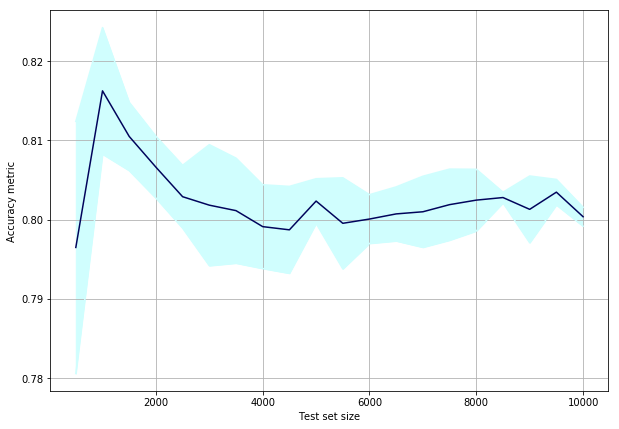

In [53]:
x = np.asarray(set_size)
accuracy_y = np.asarray(accuracy_metric)
variance_y = np.asarray(variances)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_metric,  color='#00035b')
plt.plot(set_sizes, accuracy_y + np.sqrt(variance_y),color='#d0fefe')
plt.plot(set_sizes, accuracy_y - np.sqrt(variance_y), color='#d0fefe')
plt.fill_between(set_sizes, accuracy_y + np.sqrt(variance_y), accuracy_y - np.sqrt(variance_y), color='#d0fefe')
plt.grid()
plt.xlabel("Test set size")
plt.ylabel("Accuracy metric")
plt.show()


### Вывод
 Чтобы уменьшить вычислительные сложности, можно использовать размер тестовой выюорки около 6000 объектов